In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [3]:
train = pd.read_csv('../data/20_bioresponse.csv')

## Predicting a Biological Response

Predict a biological response of molecules from their chemical properties  
https://www.kaggle.com/c/bioresponse/data

Каждая строка в этом наборе данных представляет молекулу. Первый столбец содержит экспериментальные данные, описывающие реальную биологическую реакцию; было обнаружено, что молекула вызывает эту реакцию (1) или нет (0). Остальные столбцы представляют молекулярные дескрипторы (от d1 до d1776), это рассчитанные свойства, которые могут отражать некоторые характеристики молекулы, например, размер, форму или элементный состав. Матрица дескрипторов была нормализована.

Activity : target 0 / 1  
D1-D1776 : featuteres - нормализованные

In [5]:
train.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


почти квадратная матрица  
3700 примеров и 1700 признаков

In [11]:
train.shape

(3751, 1777)

In [ ]:
train.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


часть признаков бинарные 0/1 (например D4)  
.info() говорит, что 835 признаков int64 - возможно все они бинарные  
возможно такое большое кол-во признаков получилось после one-hot-encoding  
все признаки числовые

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


c D4 не угадал он не бинарный - видимо, все значения больше 0 в последнем квартиле  

In [59]:
train.D4.unique()

array([0.  , 0.5 , 0.25, 0.75, 1.  ])

поищем бинарные признаки (почти половина признаков бинарные)

In [87]:
nu=train.nunique()
nu[nu==2]

Activity    2
D23         2
D27         2
D28         2
D51         2
           ..
D1772       2
D1773       2
D1774       2
D1775       2
D1776       2
Length: 836, dtype: int64

<Axes: xlabel='Activity', ylabel='count'>

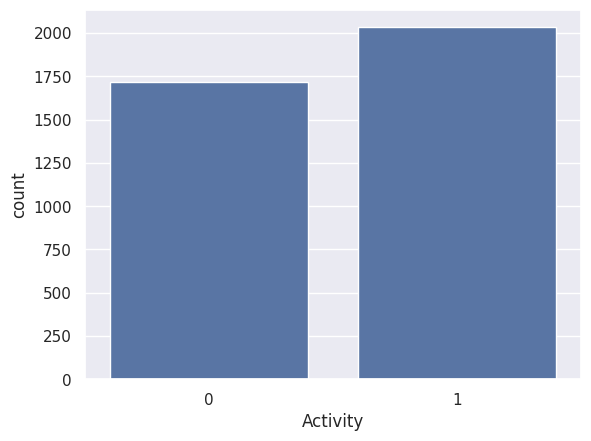

In [ ]:
sns.countplot(x=train.Activity)

что с такими признаками делать? образцов категории 0 мало

<Axes: xlabel='D23', ylabel='count'>

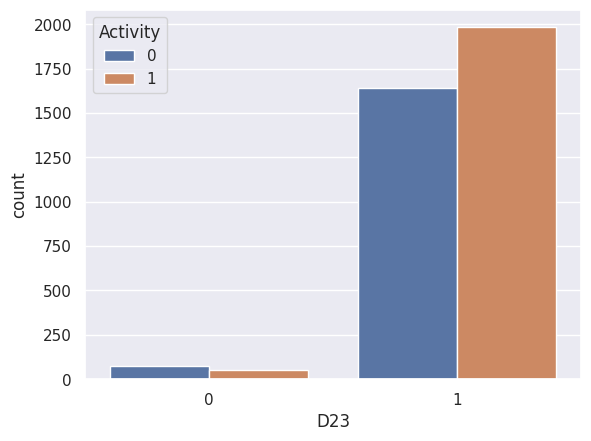

In [ ]:
sns.countplot(data=train, x='D23', hue='Activity')

бинарные признаки  
что-то типа pairplot  
? пока не понятно что на диагонали

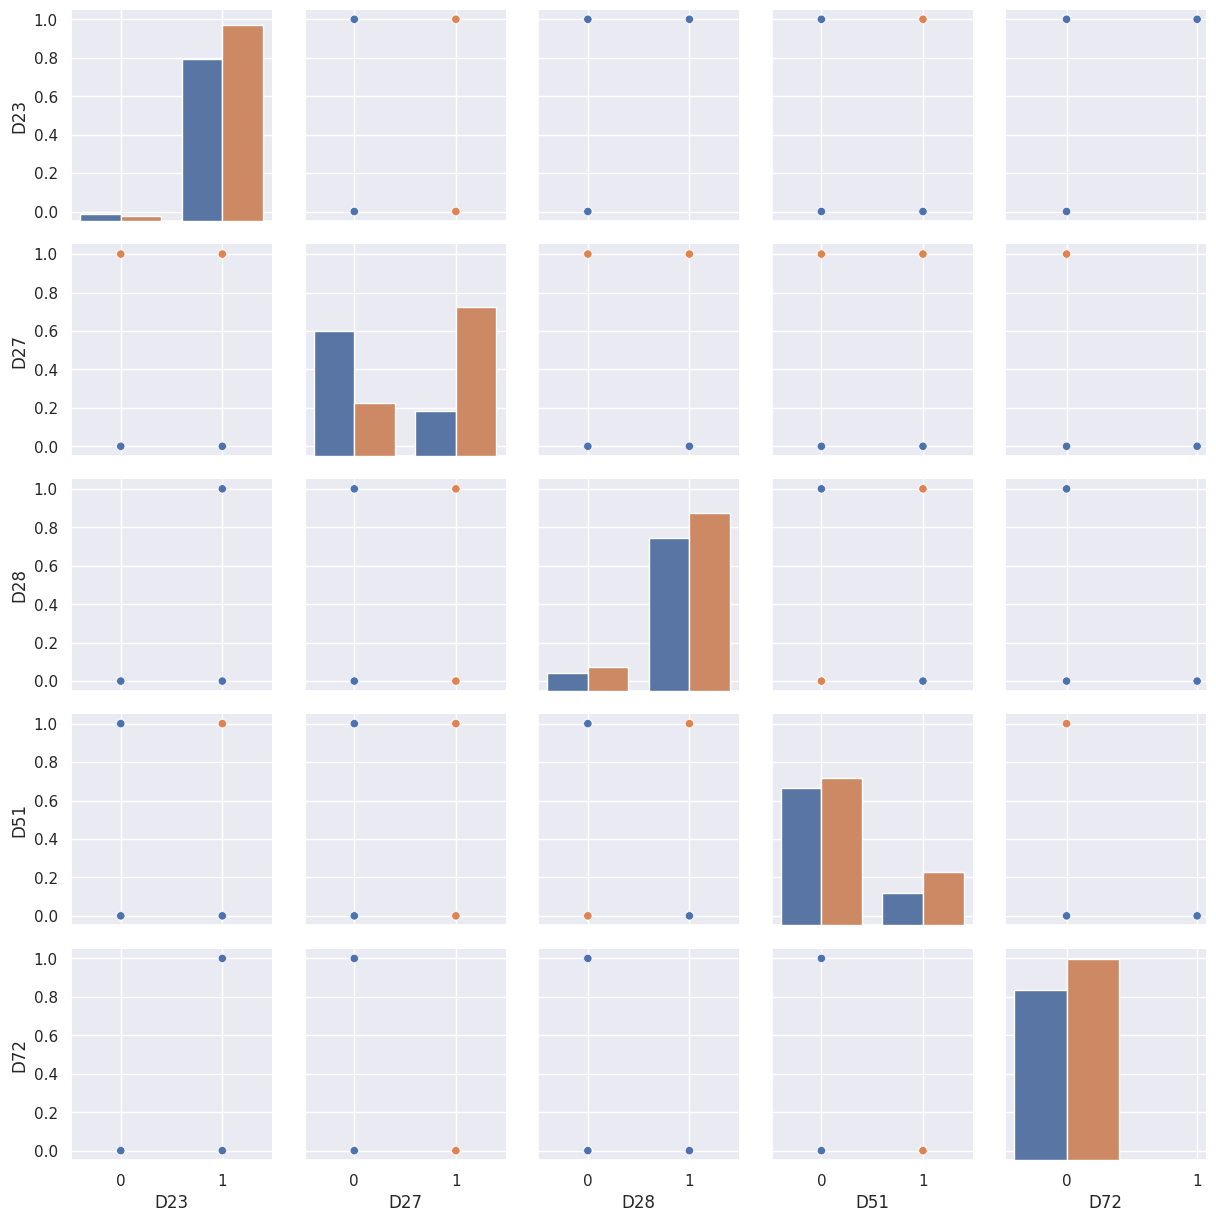

In [ ]:
v=nu.index[nu==2][1:6]
g=sns.PairGrid(train, hue="Activity", vars=v)
g.map_diag(sns.countplot)
g.map_offdiag(sns.scatterplot)

## Заполнение пропусков

пропусков нет 

In [31]:
is_null_s = train.isnull().sum()
is_null_s[is_null_s>0]

Series([], dtype: int64)

In [28]:
v = pd.Series([0,1,2],index=('a','b','c'))
v[v>1]

c    2
dtype: int64